In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/graph.csv')
df

,source,target,relation
0,1,BC133,uses
1,2,BC133,uses
2,3,BC133,uses
3,4,BC133,uses
4,1,BC473,uses
...,...,...,...
132969,T040S,BC618,enables
132970,T040T,BC618,enables
132971,T042Z,BC618,enables
132972,T043,BC313,enables


In [9]:
items = df[(df['relation'] == 'uses') & (df['source']=='4')]['target'].unique()
items

array(['BC133', 'BC473', 'BC693', 'BC314', 'BC413', 'BC486', 'BC324',
       'BC673', 'BC264', 'BC239', 'BC686', 'BC083', 'BC248', 'BC244',
       'BC628', 'BC420', 'BC225', 'BC454', 'BC681', 'BC721', 'BC452',
       'BC183', 'BC308', 'BC012', 'BC160', 'BC607', 'BC178', 'BC303',
       'BC157', 'BC174', 'BC727', 'BC288', 'BC306', 'BC304', 'BC320',
       'BC322', 'BC079', 'BC606', 'BC624', 'BC312', 'BC073', 'BC282',
       'BC279', 'BC067', 'BC537', 'BC525', 'BC093', 'BC077', 'BC195',
       'BC245', 'BC685', 'BC477', 'BC166', 'BC126', 'BC095', 'BC074',
       'BC235', 'BC722', 'BC549', 'BC660', 'BC065', 'BC382', 'BC548',
       'BC223', 'BC326', 'BC605', 'BC656', 'BC163', 'BC056', 'BC103',
       'BC112', 'BC502', 'BC251', 'BC618', 'BC517', 'BC297', 'BC273',
       'BC697', 'BC276', 'BC446', 'BC313', 'BC622'], dtype=object)

In [13]:
'BC019' in items

False

{1: [0.31234, 0.62468, 1.24936], 5: [0.22432, 0.44864, 0.89728], 10: [0.32343, 0.64686, 1.29372], 15: [0.42343, 0.84686, 1.69372], 20: [0.52341, 1.04682, 2.09364]}


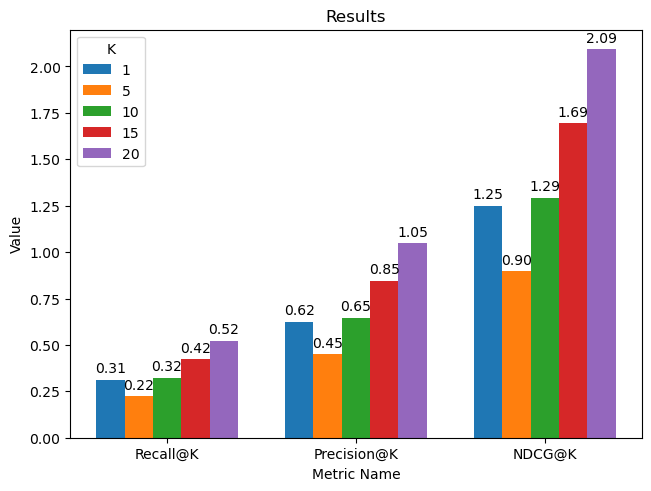

In [58]:
K = [1, 5, 10, 15, 20]
recalls = [.31234,.22432,.32343,.42343,.52341]
precisions = [recall*2 for recall in recalls]
ndcgs = [prec*2 for prec in precisions]

# plot_dict = {
#     'Recall': recalls,
#     'Precision': precisions,
#     'NDCG': ndcgs
# }

plot_dict={}
for i, k in enumerate(K):
    plot_dict[k] = [recalls[i], precisions[i], ndcgs[i]]
    
print(plot_dict)

metrics = ['Recall@K', 'Precision@K', 'NDCG@K']

fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for metric, val in plot_dict.items():
    metric = str(metric)
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=metric)
    ax.bar_label(rects, padding=3, fmt='%.2f')
    multiplier += 1

ax.set_xlabel('Metric Name')
ax.set_ylabel('Value')
ax.set_title('Results')
ax.set_xticks(x + width*2, metrics)
ax.legend(title='K')
plt.show()

In [61]:
res_dict = {
    'K': K,
    'Recall@K': recalls,
    'Precision@K': precisions,
    'NDCG@K': ndcgs,
}

pd.DataFrame(res_dict)

,K,Recall@K,Precision@K,NDCG@K
0,1,0.31234,0.62468,1.24936
1,5,0.22432,0.44864,0.89728
2,10,0.32343,0.64686,1.29372
3,15,0.42343,0.84686,1.69372
4,20,0.52341,1.04682,2.09364


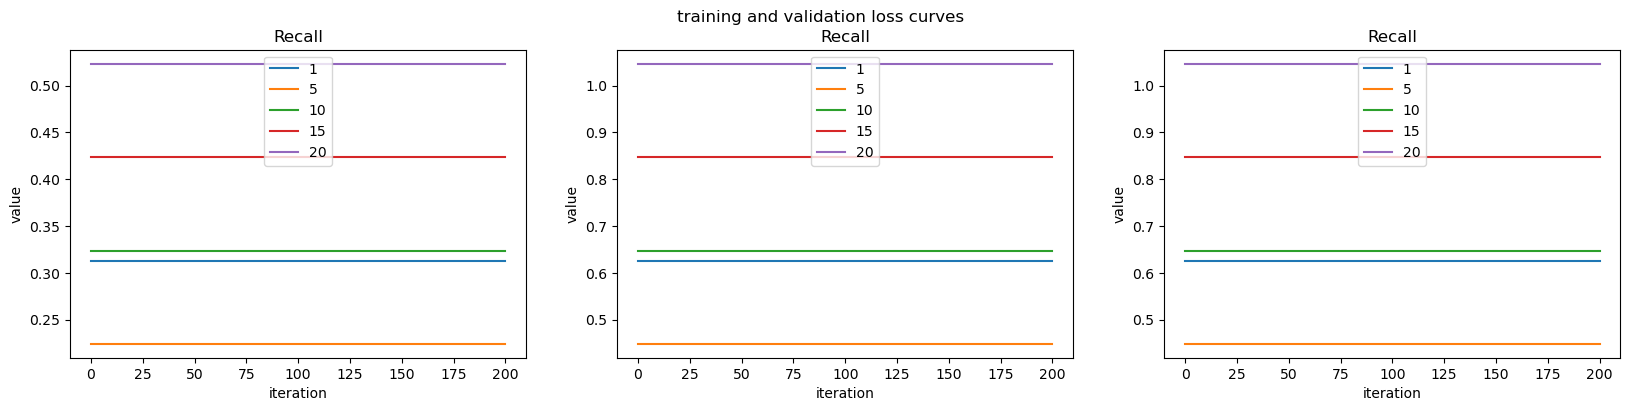

In [57]:
val_recalls = [recalls, recalls]
val_precisions = [precisions, precisions]
val_ndcgs = [ndcgs, ndcgs]
K = [str(x) for x in [1, 5, 10, 15, 20]]

fig, axes = plt.subplots(1,3, figsize=(20,4))

iters = [iter * 200 for iter in range(len(val_recalls))]
axes[0].plot(iters, val_recalls, label=K)
axes[0].set_xlabel('iteration')
axes[0].set_ylabel('value')
axes[0].set_title('Recall')
axes[0].legend()

axes[1].plot(iters, val_precisions, label=K)
axes[1].set_xlabel('iteration')
axes[1].set_ylabel('value')
axes[1].set_title('Recall')
axes[1].legend()

axes[2].plot(iters, val_precisions, label=K)
axes[2].set_xlabel('iteration')
axes[2].set_ylabel('value')
axes[2].set_title('Recall')
axes[2].legend()

fig.suptitle('training and validation loss curves')

plt.show()

In [5]:
import torch

model_path = '/Users/I524012/Desktop/CompGCN/results/lightgcn_26_11_2023_11:13:46_iter1000/model.model'
sdict = torch.load(model_path)

In [8]:
sdict['best_iter']

800

In [84]:
df = pd.read_csv('csv_results/results_light.csv')
df

,K,Recall@K,Precision@K,NDCG@K
0,1,0.10268,0.75000,0.75000
1,5,0.46875,0.70000,0.70610
2,10,0.69643,0.52500,0.69870
3,15,0.72768,0.36667,0.71578
4,20,0.86161,0.32500,0.77910


In [85]:
mult_df = pd.read_csv('csv_results/results_mult80.csv')
sub_df = pd.read_csv('csv_results/results_sub.csv')
sub_df

,K,Recall@K,Precision@K,NDCG@K
0,1,0.13393,1.00000,1.00000
1,5,0.49554,0.75000,0.80787
2,10,0.72321,0.55000,0.77651
3,15,0.86161,0.43333,0.84896
4,20,0.89286,0.33750,0.86384


In [87]:
df['model'] = 'LightGCN'
# sub_df['model'] = 'CompSub'
mult_df['model'] = 'CompMult (80% Dropout)'

# df = pd.concat([df, sub_df, mult_df], axis=0)
df = pd.concat([df, mult_df], axis=0)
df

,K,Recall@K,Precision@K,NDCG@K,model
0,1,0.10268,0.75000,0.75000,LightGCN
1,5,0.46875,0.70000,0.70610,LightGCN
2,10,0.69643,0.52500,0.69870,LightGCN
3,15,0.72768,0.36667,0.71578,LightGCN
4,20,0.86161,0.32500,0.77910,LightGCN
0,1,0.13393,1.00000,1.00000,LightGCN
1,5,0.50446,0.75000,0.81309,LightGCN
2,10,0.66071,0.50000,0.74102,LightGCN
3,15,0.79911,0.40000,0.81418,LightGCN
4,20,0.89732,0.33750,0.86028,LightGCN


In [88]:
K = df['K'].unique()

recall_dict = {}
precision_dict = {}
ndcg_dict = {}

for model in df['model'].unique():
    recall_dict[model] = []
    precision_dict[model] = []
    ndcg_dict[model] = []
    for k in K:
        metrics = df[(df['K'] == k) & (df['model'] == model)]
        
        recall = metrics['Recall@K'].iloc[0]
        recall_dict[model].append(recall)
        
        precision = metrics['Precision@K'].iloc[0]
        precision_dict[model].append(precision)
        
        ndcg = metrics['NDCG@K'].iloc[0]
        ndcg_dict[model].append(ndcg)

# axes[0,0] = plt.bar()
print(recall_dict)
print(precision_dict)
print(ndcg_dict)

{'LightGCN': [0.10268, 0.46875, 0.69643, 0.72768, 0.86161], 'CompMult (80% Dropout)': [0.13393, 0.50446, 0.66071, 0.79911, 0.89732]}
{'LightGCN': [0.75, 0.7, 0.525, 0.36667, 0.325], 'CompMult (80% Dropout)': [1.0, 0.75, 0.5, 0.4, 0.3375]}
{'LightGCN': [0.75, 0.7061, 0.6987, 0.71578, 0.7791], 'CompMult (80% Dropout)': [1.0, 0.81309, 0.74102, 0.81418, 0.86028]}


/Users/I524012/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/Users/I524012/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


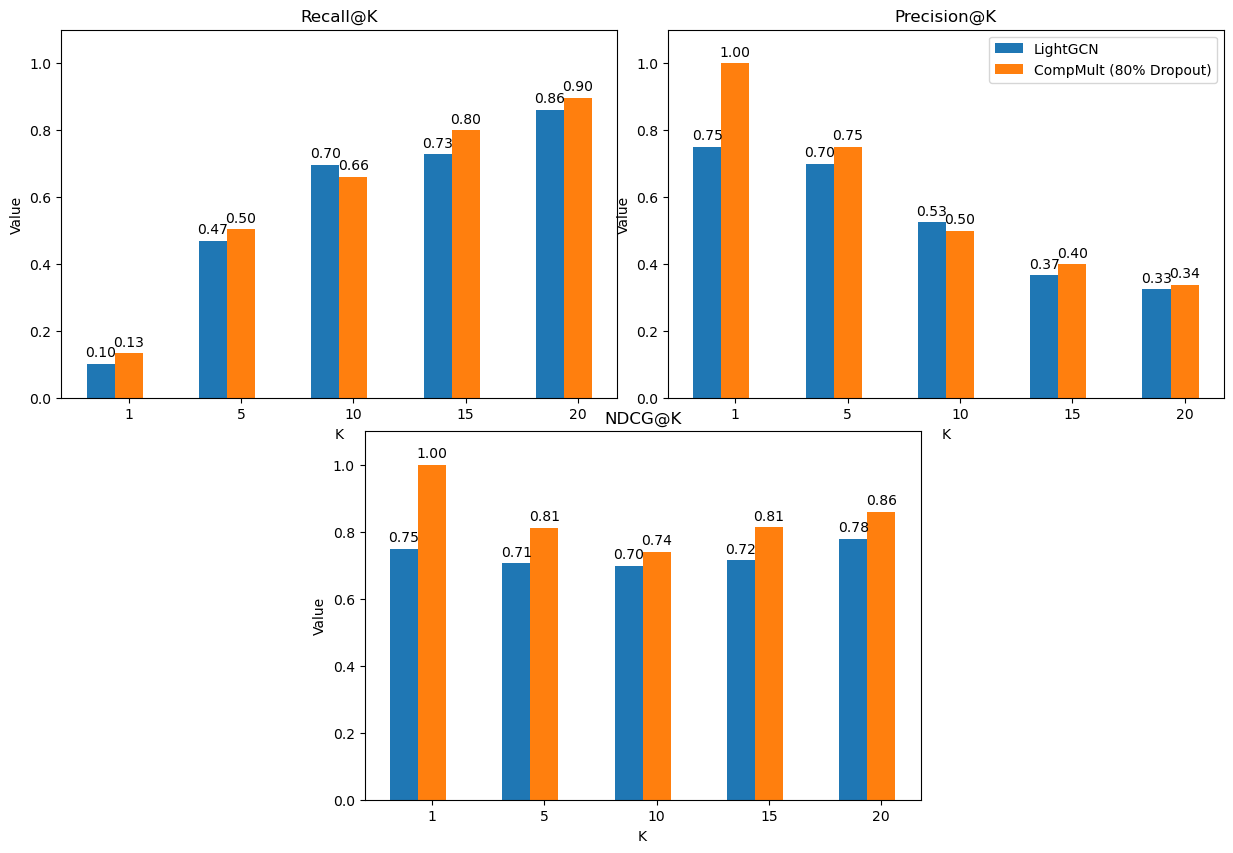

In [89]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(4, 4)

fig = plt.figure(figsize=(15,10), layout='constrained')
fig.add_gridspec(4, 4)

def plot_metric(dict, title, ax, K):
    
    x = np.arange(len(K))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    
    for attribute, measurement in dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, fmt='%.2f')
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('K')
    ax.set_ylabel('Value')
    ax.set_title(title)
    ax.set_xticks(x + width, K)
    # ax.legend(loc='upper left', ncols=3)
    #ax.legend()
    ax.set_ylim(0, 1.1)

plot_metric(recall_dict, 'Recall@K', ax=plt.subplot(gs[:2, :2]), K=K)
plot_metric(precision_dict, 'Precision@K', ax=plt.subplot(gs[:2, 2:]), K=K)
plot_metric(ndcg_dict, 'NDCG@K', ax=plt.subplot(gs[2:4, 1:3]), K=K)

plt.subplot(gs[:2, 2:]).legend()

In [101]:
df_0 = pd.read_csv('csv_results/results_mult.csv')
df_0['dropout'] = 0

df_20 = pd.read_csv('csv_results/results_mult20.csv')
df_20['dropout'] = 20

df_40 = pd.read_csv('csv_results/results_mult40.csv')
df_40['dropout'] = 40

df_60 = pd.read_csv('csv_results/results_mult60.csv')
df_60['dropout'] = 60

df_80 = pd.read_csv('csv_results/results_mult80.csv')
df_80['dropout'] = 80
df_80

,K,Recall@K,Precision@K,NDCG@K,dropout
0,1,0.13393,1.0000,1.00000,80
1,5,0.50446,0.7500,0.81309,80
2,10,0.66071,0.5000,0.74102,80
3,15,0.79911,0.4000,0.81418,80
4,20,0.89732,0.3375,0.86028,80


In [102]:
# df = pd.concat([df_0, df_40, df_60, df_80])
df = pd.concat([df_0, df_20, df_40, df_60, df_80])
df['K'] = df['K'].astype(str)
df

,K,Recall@K,Precision@K,NDCG@K,dropout
0,1,0.13393,1.00000,1.00000,0
1,5,0.66964,1.00000,1.00000,0
2,10,0.96429,0.72500,0.96397,0
3,15,0.96429,0.48333,0.96397,0
4,20,0.96429,0.36250,0.96397,0
0,1,0.13393,1.00000,1.00000,20
1,5,0.53571,0.80000,0.85549,20
2,10,0.83036,0.62500,0.85900,20
3,15,0.93304,0.46667,0.91442,20
4,20,0.96429,0.36250,0.92990,20


In [105]:
df_60

,K,Recall@K,Precision@K,NDCG@K,dropout
0,1,0.13393,1.00000,1.00000,60
1,5,0.42411,0.65000,0.71936,60
2,10,0.65179,0.50000,0.70488,60
3,15,0.75446,0.38333,0.75644,60
4,20,0.79018,0.30000,0.77208,60


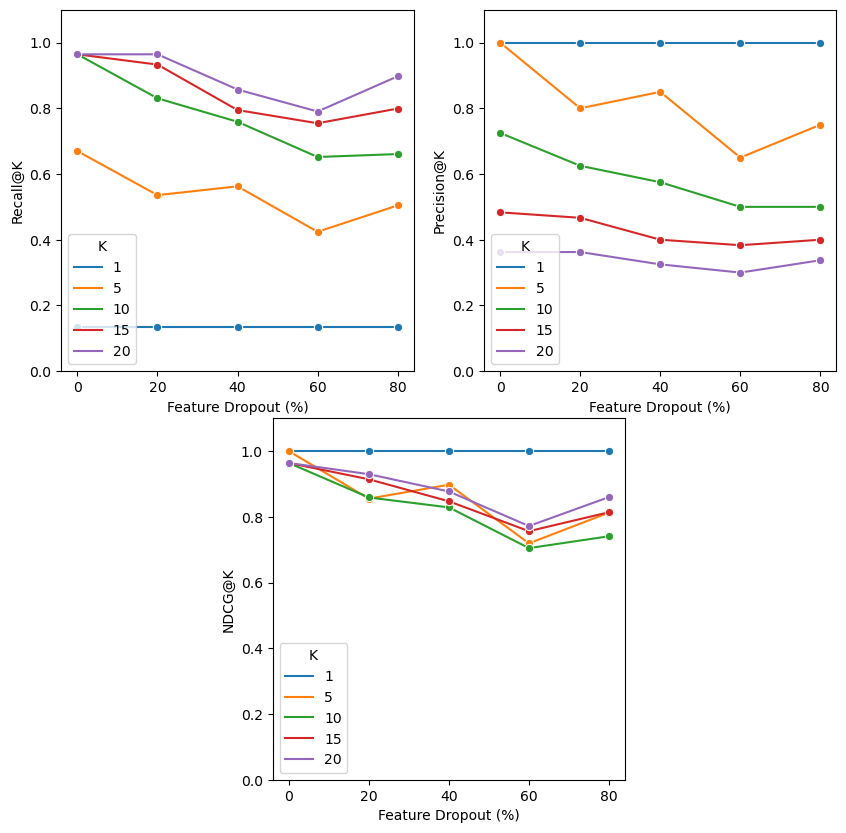

In [104]:
import seaborn as sns
import warnings

warnings.simplefilter('ignore', category=FutureWarning)

gs = gridspec.GridSpec(4, 4, wspace=0.5)

fig = plt.figure(figsize=(10,10))
fig.add_gridspec(4, 4)


for i, metric in enumerate(df.drop(columns=['K', 'dropout']).columns):
    if i == 0:
        ax = plt.subplot(gs[:2, :2])
    elif i==1:
        ax = plt.subplot(gs[:2, 2:])
    else:
        ax = ax=plt.subplot(gs[2:4, 1:3])
    g = sns.lineplot(data = df, x='dropout', y = metric, hue='K', marker='o', ax=ax)
    g.set(xlabel="Feature Dropout (%)", ylim=(0,1.1))
    
plt.subplots_adjust(hspace=0.3)